# Online Gamers Behavior Analysis 📅
### This notebook explores the behavioral patterns of online gamers using the Online Gaming Behavior dataset. The goal is to understand how factors like age, gender, engagement level, and game difficulty influence playtime, in-game purchases, and player achievements.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
df = pd.read_csv("/content/online_gaming_behavior_dataset.csv")

# Brief Overview of the Dataset 🧾.
### The dataset includes demographic and behavioral attributes such as:

### 1. Age, Gender, and Location

### 2. GameGenre, GameDifficulty, and EngagementLevel

### 3. PlayTimeHours, SessionsPerWeek, and AvgSessionDurationMinutes

### 4. InGamePurchases and AchievementsUnlocked

### 5. These variables together provide a broad view of gamer habits and tendencies.

In [3]:
df.describe().round(2)

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.00,40034.00,40034.00,40034.0,40034.00,40034.00,40034.00,40034.00
mean,29016.50,31.99,12.02,0.2,9.47,94.79,49.66,24.53
std,11556.96,10.04,6.91,0.4,5.76,49.01,28.59,14.43
min,9000.00,15.00,0.00,0.0,0.00,10.00,1.00,0.00
25%,19008.25,23.00,6.07,0.0,4.00,52.00,25.00,12.00
50%,29016.50,32.00,12.01,0.0,9.00,95.00,49.00,25.00
75%,39024.75,41.00,17.96,0.0,14.00,137.00,74.00,37.00
max,49033.00,49.00,24.00,1.0,19.00,179.00,99.00,49.00


In [4]:
df.head().round(2)

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.27,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.53,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.22,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.27,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.53,0,Medium,2,131,95,37,Medium


In [5]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 40034 rows and 13 columns.


# Age Distribution Analysis.

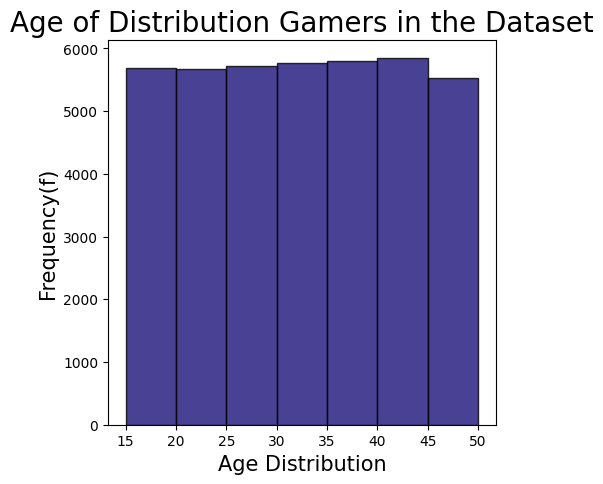

In [6]:
plt.figure(figsize=(5,5))
plt.hist(df["Age"], bins=[15, 20,25,30,35,40,45,50],color="#1B1179B3", edgecolor="black", alpha=0.8)
plt.title("Age of Distribution Gamers in the Dataset",fontsize=20)
plt.ylabel("Frequency(f)",fontsize=15)
plt.xlabel("Age Distribution",fontsize=15)
plt.show()

### A histogram was plotted to analyze the age spread among players. The distribution appears approximately uniform, suggesting that all age ranges are almost equally represented in the dataset. This means age is unlikely to be a strong differentiator in gaming behavior for this sample.

# Gender Distribution in Dataset.

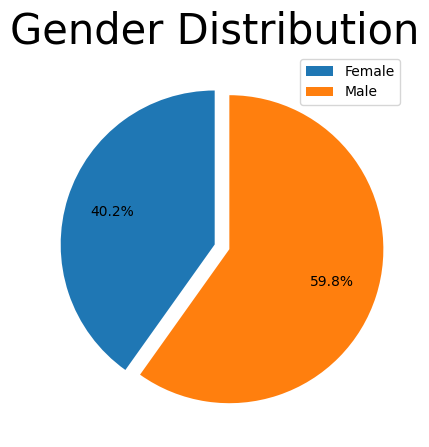

In [7]:
Gender_distribution= df.pivot_table(index="Gender", values="PlayerID", aggfunc="count")
spacing= [0,0.1]
plt.figure(figsize=(5,5))
plt.pie(Gender_distribution["PlayerID"], explode= spacing, autopct= "%.1f%%",pctdistance=0.7,startangle=90)
plt.legend(labels=Gender_distribution.index)
plt.title("Gender Distribution",fontsize=30)
plt.show()

### A pie chart and bar plot were used to visualize gender proportions in the dataset. The dataset consists of roughly 60% male and 40% female gamers, showing a moderate gender imbalance.

# Gamer Engagement Insights Dashboard

## ⏱️Average Gaming Sesssion Duration by Age Groups.

In [8]:
bins=np.arange(15,51,5)
labels=[f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]
df["Age Range"]= pd.cut(df["Age"], bins=bins,labels=labels,include_lowest=True)
average_playtime_by_age= df.pivot_table(index="Age Range", values= "AvgSessionDurationMinutes", aggfunc=("mean",'std'),observed=False)
average_playtime_by_age.round(2)

,mean,std
Age Range,,
15-20,95.42,48.86
20-25,94.42,48.69
25-30,93.83,49.17
30-35,94.92,48.99
35-40,95.91,48.93
40-45,94.37,48.96
45-50,94.49,49.65


In [9]:
df.drop(columns=["Age Range"], inplace=True)

### Average session durations were computed for different age groups.
### Across all ranges, the average playtime per session is about 95 minutes, with a standard deviation of around 48 minutes.
### According to the empirical rule, approximately 68.5% of players spend between 47 and 143 minutes per gaming session.

### This suggests that most players exhibit consistent engagement levels, regardless of age.

## Number of Purchases by Genders 🚻.

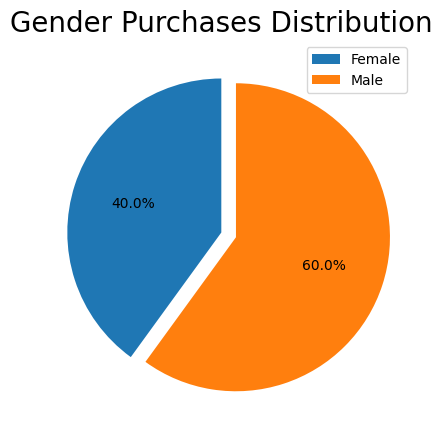

In [10]:
df["InGamePurchases"]= df["InGamePurchases"].replace({0:"No",1:"Yes"})
Gender_purchases= df[df["InGamePurchases"]=="Yes"].groupby("Gender")["PlayerID"].count()
Gender_purchases_percent=((Gender_purchases/Gender_purchases.sum(axis=0))*100).round(0)
Gender_purchases_percent= Gender_purchases_percent.reset_index()
Gender_purchases_percent.rename(columns={"PlayerID":"%"}, inplace=True)
spacing= [0,0.1]
plt.figure(figsize=(5,5))
plt.pie(Gender_purchases_percent["%"], explode= spacing, autopct= "%.1f%%",startangle=90)
plt.legend(labels=Gender_purchases_percent["Gender"])
plt.title("Gender Purchases Distribution",fontsize=20)
plt.show()

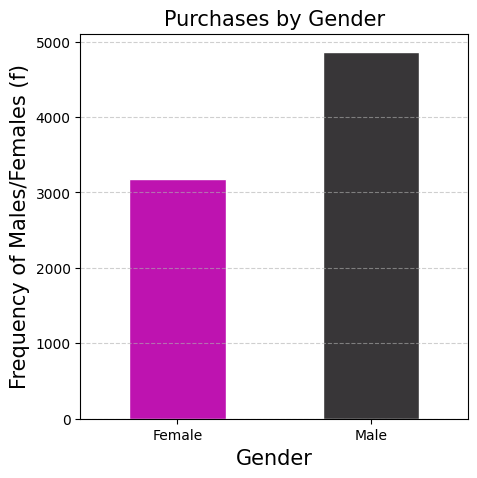

In [11]:
Gender_purchases.plot(kind="bar",figsize=(5,5), color=["#BE13B0", "#383638"],edgecolor="white")
plt.title("Purchases by Gender",fontsize=15)
plt.xlabel("Gender",fontsize=15)
plt.ylabel("Frequency of Males/Females (f)",fontsize=15)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.xticks(rotation= 0)
plt.show()

### Further analysis revealed that:

### .60% of in-game purchases were made by male players

### .40% by female players

#### This pattern mirrors the overall gender distribution, implying similar spending behavior across genders.

# 📊 Analysis of Engagment Level and No. of Achievements in Game.

In [12]:
achievements_by_engagement_level= df.pivot_table(index='EngagementLevel', values="AchievementsUnlocked", aggfunc=("count"))

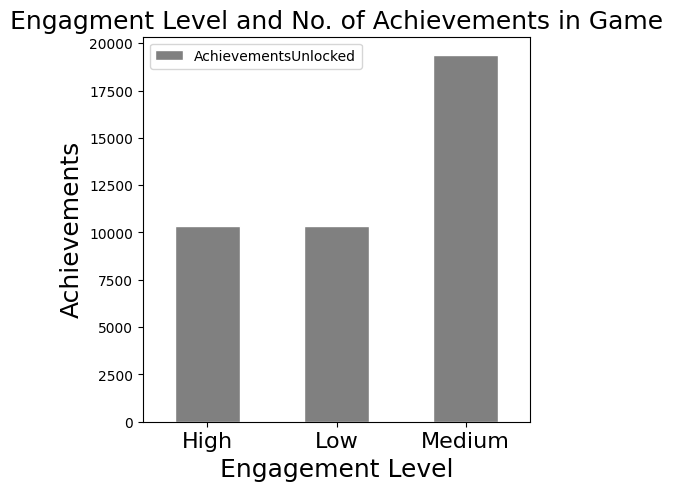

In [13]:
achievements_by_engagement_level.plot(kind="bar",figsize=(5,5),color=["Gray"],edgecolor="white")
plt.title("Engagment Level and No. of Achievements in Game",fontsize=18)
plt.ylabel("Achievements",fontsize=18)
plt.xlabel("Engagement Level", fontsize=18)
plt.xticks(rotation=360,fontsize=16)
plt.show()

### When comparing engagement level to achievements unlocked, players categorized as having medium engagement unlocked the highest number of achievements overall.
### This may indicate that moderate, consistent engagement leads to better in-game progress than extreme or minimal playtime.

# Average Weekly Sessions 📅 according to Gender🚻.

In [14]:
average_weekly_sessions_gender=df.pivot_table(index="Gender", values="SessionsPerWeek", aggfunc=("mean","std"),observed=False)
average_weekly_sessions_gender=average_weekly_sessions_gender.rename(columns={"mean":"Average Weekly Sessions"})
average_weekly_sessions_gender.round(0)

,Average Weekly Sessions,std
Gender,,
Female,10.0,6.0
Male,9.0,6.0


### Average weekly sessions were found to be:

### .Male gamers: ~9 sessions/week

### .Female gamers: ~10 sessions/week

### Both genders have a similar standard deviation (~6 sessions), showing that most players fall within ±6 sessions of the mean, indicating steady weekly gaming habits.

# Gaming Genres🎮 Popularity by Genders.

In [15]:
genres_bygenders= df.pivot_table(index="GameGenre", columns="Gender",values="PlayerID", aggfunc="count", observed=False)
genres_bygenders

Gender,Female,Male
GameGenre,,
Action,3149,4890
RPG,3235,4717
Simulation,3218,4765
Sports,3243,4805
Strategy,3230,4782


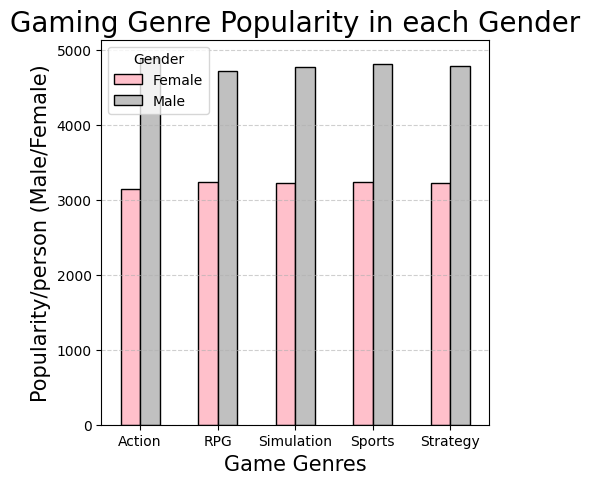

In [16]:
genres_bygenders.plot(kind="bar", figsize=(5,5), color=["Pink", "Silver"], edgecolor='Black')
plt.xticks(rotation=360)
plt.title('Gaming Genre Popularity in each Gender', fontsize=20)
plt.xlabel("Game Genres", fontsize=15)
plt.ylabel("Popularity/person (Male/Female)",fontsize=15)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

### A grouped bar plot revealed the distribution of different game genres by gender. Although preferences vary slightly, Strategy and Action games were popular across both genders, with females showing slightly higher representation in casual and simulation genres.

# Game Genres🎮 and their Difficulty level⚙️ relationship.

In [17]:
difficulty_by_genres=df.pivot_table(index='GameGenre',columns='GameDifficulty', values="PlayerID", aggfunc="count", observed=True)
difficulty_by_genres

GameDifficulty,Easy,Hard,Medium
GameGenre,,,
Action,4100,1573,2366
RPG,3916,1673,2363
Simulation,3990,1602,2391
Sports,4024,1587,2437
Strategy,3985,1573,2454


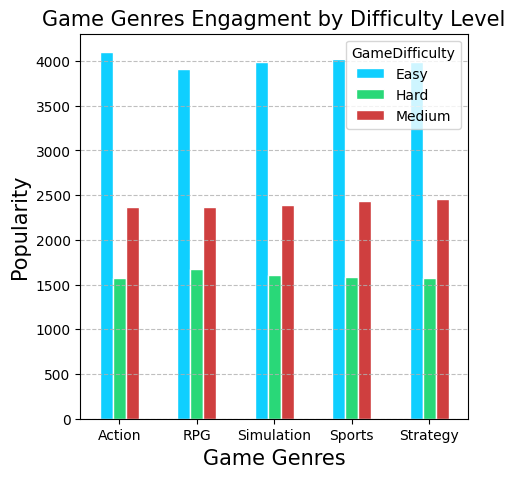

In [18]:
difficulty_by_genres.plot(kind="bar",figsize=(5,5), color=["#0FCFFF", "#29D878","#CF3F3F"],edgecolor="White")
plt.title("Game Genres Engagment by Difficulty Level",fontsize=15)
plt.xlabel("Game Genres",fontsize=15)
plt.xticks(rotation=360)
plt.ylabel("Popularity",fontsize=15)
plt.grid(axis="y", linestyle="--", alpha=0.8)
plt.show()

### Most players were found to play on easy difficulty, followed by medium, while hard difficulty had the fewest players. Interestingly, the easy-difficulty group also made the most in-game purchases, possibly due to their casual playstyle and interest in customization or faster progress.

# Game Difficulty⚙️ and Game Engagment Level🔥.

In [19]:
game_difficulty_engagement=df.pivot_table(index='GameDifficulty', columns="EngagementLevel", values="PlayerID",aggfunc="count")
game_difficulty_engagement

EngagementLevel,High,Low,Medium
GameDifficulty,,,
Easy,5132,5206,9677
Hard,2112,2076,3820
Medium,3092,3042,5877


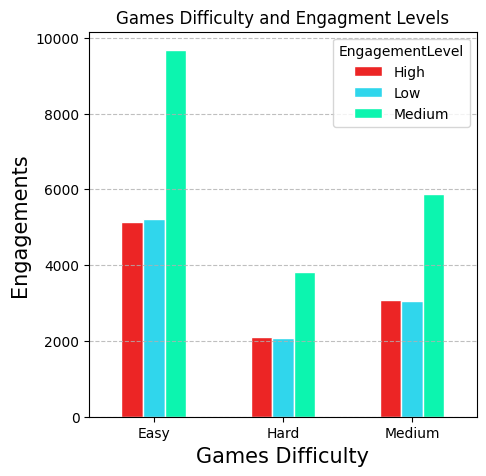

In [20]:
game_difficulty_engagement.plot(kind="bar",figsize=(5,5), color=["#EC2525", "#30D6EC","#0CF5AF"],edgecolor="White")
plt.xticks(rotation=360)
plt.title("Games Difficulty and Engagment Levels")
plt.xlabel("Games Difficulty", fontsize=15)
plt.ylabel("Engagements", fontsize=15)
plt.grid(axis="y", linestyle="--", alpha=0.8)
plt.show()

### Based on the graphical analysis and statistical calculations, it is observed that most games, regardless of their difficulty level, exhibit predominantly medium levels of player engagement. However, when considering overall engagement trends, games with easy difficulty tend to have the highest average engagement, followed by those with medium difficulty. In contrast, hard difficulty games show the lowest overall engagement across the dataset.

# Average Player Level 🧗 across Diffculty Levels⚙️.

In [21]:
avg_player_difficultylevel= df.pivot_table(index="GameDifficulty", values="PlayerLevel", aggfunc=("mean",'std'),observed=True)
avg_player_difficultylevel.round(0)

,mean,std
GameDifficulty,,
Easy,50.0,29.0
Hard,50.0,29.0
Medium,50.0,28.0


### Based on the statistical calculations, the average player level across all difficulty levels is approximately 50, with a standard deviation of 29. This indicates that about 68.5% of the players fall within ±29 points of the mean level (i.e., between levels 21 and 79) for each difficulty category, reflecting a moderately wide spread of player performance within the dataset.

# Average Achievements🏆 per Player across Engagement Levels🔥.

In [22]:
avg_achievements_on_engagement= df.pivot_table(index="EngagementLevel", values="AchievementsUnlocked",aggfunc=("mean","std"),observed=False)
avg_achievements_on_engagement=avg_achievements_on_engagement.rename(columns={"mean":"Average Achievements"})
avg_achievements_on_engagement.round(0)

,Average Achievements,std
EngagementLevel,,
High,25.0,14.0
Low,23.0,14.0
Medium,25.0,14.0


### From the statistical analysis, it is observed that the average number of achievements per player is 25 for both high and medium difficulty level players, and 23 for low difficulty level players. The standard deviation is 14 across all groups, indicating that approximately 68.5% of players’ achievements fall within ±14 units of the average number of achievements per player. This suggests a moderate variation in player performance across different difficulty levels.

# Number of Purchases💸 based on Difficulty Levels.

In [23]:
purchases_by_difficulty_level= df[df["InGamePurchases"]=="Yes"].groupby("GameDifficulty")["PlayerID"].count()
purchases_by_difficulty_level

,PlayerID
GameDifficulty,
Easy,3995
Hard,1601
Medium,2445


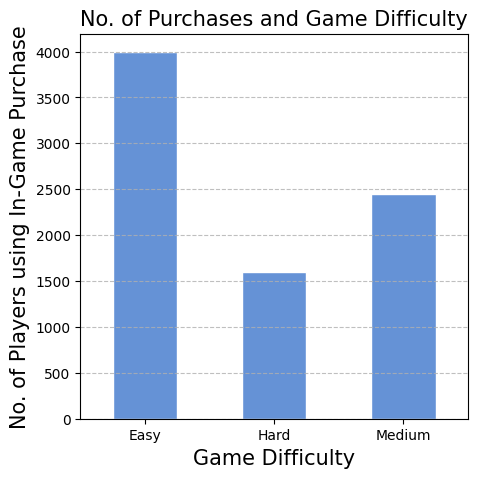

In [24]:
purchases_by_difficulty_level.plot(kind="bar", figsize=(5,5), color=["#6592D6"],edgecolor="white")
plt.xlabel("Game Difficulty",fontsize=15)
plt.ylabel("No. of Players using In-Game Purchase",fontsize=15)
plt.title("No. of Purchases and Game Difficulty",fontsize=15)
plt.xticks(rotation=360)
plt.grid(axis="y", linestyle="--", alpha=0.8)
plt.show()


# Globally🌍 more famous Genres🎮.

In [25]:
genres_globally= df.pivot_table(index= "Location", values="PlayerID", columns= "GameGenre", aggfunc="count", observed=False)
genres_globally


GameGenre,Action,RPG,Simulation,Sports,Strategy
Location,,,,,
Asia,1656,1620,1623,1582,1614
Europe,2428,2372,2414,2431,2359
Other,792,787,795,775,786
USA,3163,3173,3151,3260,3253


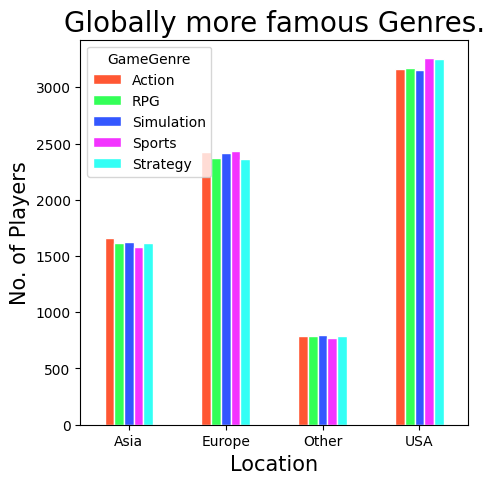

In [26]:
genres_globally.plot(kind="bar", figsize=(5,5), edgecolor="white", color=["#FF5733", "#33FF57", "#3357FF", "#F333FF", "#33FFF5"])
plt.title("Globally more famous Genres.", fontsize=20)
plt.xlabel("Location", fontsize=15)
plt.ylabel("No. of Players", fontsize=15)
plt.xticks(rotation= 0)
plt.show()

### From the Graphics its evident that all Genres are played and enjoyed almost equally in each region. Though, Action Genre has slightly more edge than other genres in regions like Asia and Europe but in USA, Sports and Strategy genres have been observed to be more popular in Data set. While most of the Players reported in Data set are from USA. Following with Europe then Asia. While lowest in other regions, which could be less developed parts of the world.

# InGame Purchases💸 by Playtime Hours⏰.

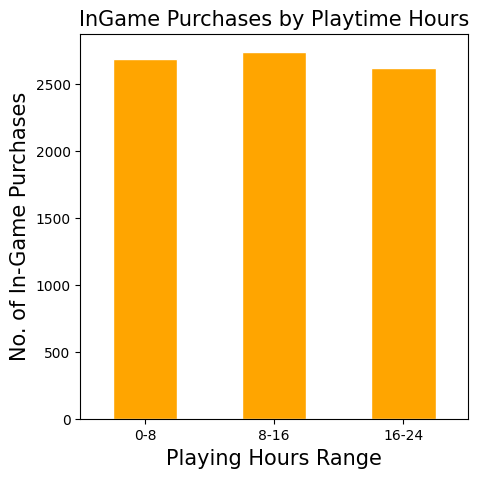

In [27]:
df["PlayTimeHours"]= df["PlayTimeHours"].astype(float)
bins=np.arange(0,25,8)
labels=[f"{bins[i]}-{bins[i+1]}"for i in range (len(bins)-1)]
df["Playing Hours Range"]= pd.cut(df["PlayTimeHours"],bins=bins, labels=labels, include_lowest=True)
ingame_purchases_by_playtime= df[df["InGamePurchases"]=="Yes"].groupby("Playing Hours Range",observed=False)["PlayerID"].count()
ingame_purchases_by_playtime.plot(kind="bar", figsize=(5,5), color=["#FFA500"], edgecolor="white")
plt.title("InGame Purchases by Playtime Hours", fontsize=15)
plt.xlabel("Playing Hours Range", fontsize=15)
plt.ylabel("No. of In-Game Purchases", fontsize=15)
plt.xticks(rotation= 0)
plt.show()

In [28]:
df.drop(columns=["Playing Hours Range"], inplace=True)

### From the Statistical Calculations and Graphics it is observed that Players whom daily Play hours are from 8 hours to 16 hours have relativey more In Game purchases than other groups. However the difference is not significant, so clear results cannot be obtained.

# Average Session Duration for Players who do InGame Purchases and not.

In [29]:
avg_session_duration_purchases= df.pivot_table(index="InGamePurchases", values="AvgSessionDurationMinutes", aggfunc=("mean","std"), observed=False)
avg_session_duration_purchases.round(2)

,mean,std
InGamePurchases,,
No,94.87,49.10
Yes,94.49,48.68


### The Statistical Calculation indicates that Average gaming session duration for Players who do Ingame Purchase and who donot are same at 95 minutes averager/day. With same S.D of 49. Meaning that most of the players(68.5%) gaming session during day is in betweeen (+-49) from 95 minutes/day.

# Relationship between Players Level🧗 and Achievements Unlocked in Games🏆.

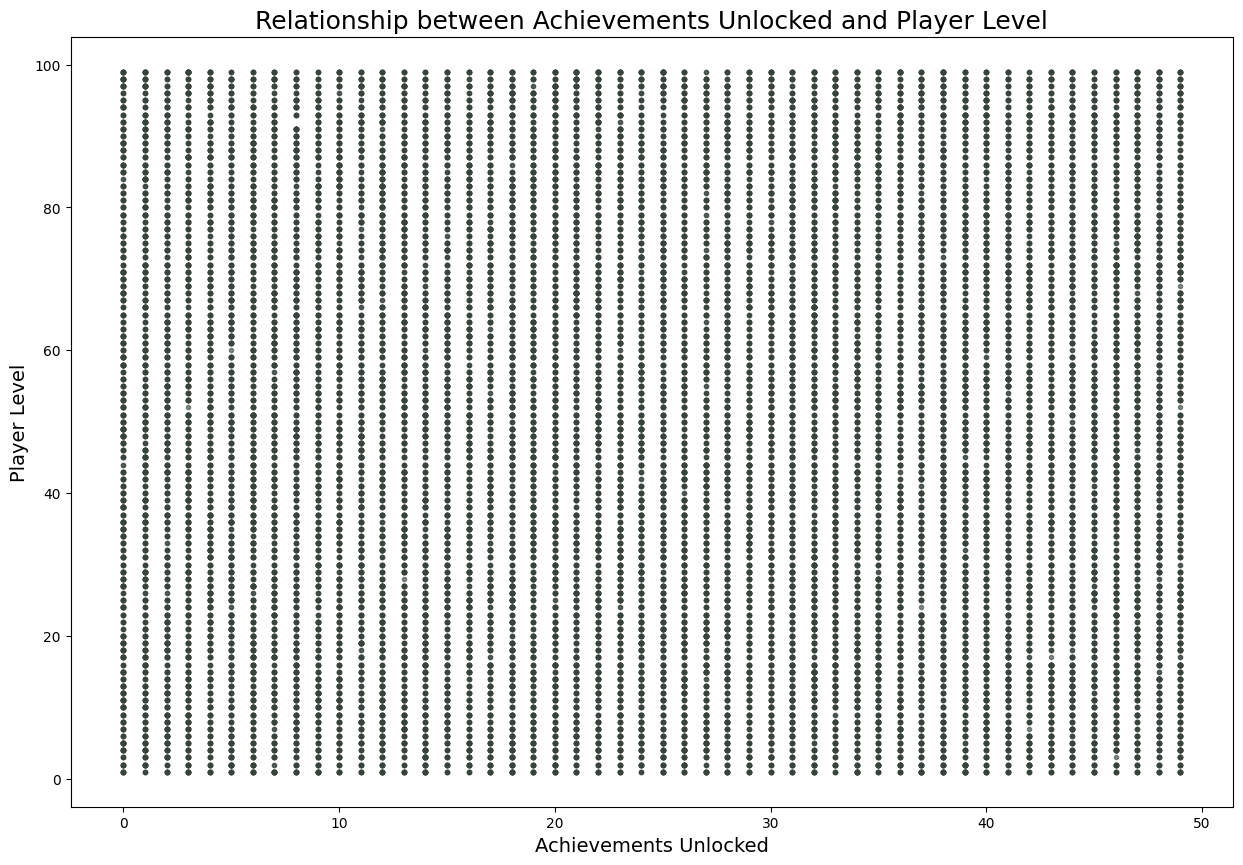

In [30]:
plt.figure(figsize=(15,10))
plt.plot(df["AchievementsUnlocked"], df["PlayerLevel"],'.', color="#36443C", alpha=0.6)
plt.title("Relationship between Achievements Unlocked and Player Level", fontsize=18)
plt.xlabel("Achievements Unlocked", fontsize=14)
plt.ylabel("Player Level", fontsize=14)
plt.show()

### As we can see from the Scatter plot there is almost very small to no relationship between No. of Achievments Unlocked and Players Level.


# Total Gaming Hours Weekly.

In [31]:
df["Total Gaming Hours Weekly"]= df["SessionsPerWeek"] * df["AvgSessionDurationMinutes"] /60
df["Total Gaming Hours Weekly"].describe().round(2)

,Total Gaming Hours Weekly
count,40034.00
mean,14.96
std,12.85
min,0.00
25%,4.47
50%,11.40
75%,22.73
max,56.68


# Engagement Levels 🔥 and Max weekly Hours of GameTime⏱️.


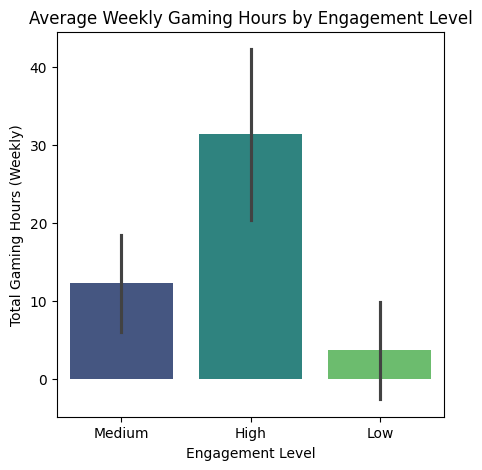

In [32]:
plt.figure(figsize=(5,5))
sns.barplot(data=df, x="EngagementLevel", y="Total Gaming Hours Weekly", errorbar="sd", palette="viridis", hue="EngagementLevel")
plt.title("Average Weekly Gaming Hours by Engagement Level")
plt.xlabel("Engagement Level")
plt.ylabel("Total Gaming Hours (Weekly)")
plt.show()

### From the Statistical Calculations and Graphics it is observed that High Engagement Players have the highest weekly playtime hours also with larges S.D.

In [33]:
# Machine Learning Extensions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [42]:
df['InGamePurchases'] = df['InGamePurchases'].map({"No": 0, "Yes": 1})
df['GameDifficulty'] = df['GameDifficulty'].map({"Easy": 0, "Medium": 1, "Hard": 2})
df['GameGenre'] = df['GameGenre'].map({
    "Action": 0,
    "RPG": 1,
    "Simulation": 2,
    "Sports": 3,
    "Strategy": 4
})

df['EngagementLevel'] = df['EngagementLevel'].map({"Low": 0, "Medium": 1, "High": 2})


In [43]:
import joblib

joblib.dump(best_model, "lightgbm_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [34]:
# Copy the main DataFrame
df_ml = df.copy()

# Encode categorical features
label_cols = ['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'InGamePurchases', 'EngagementLevel']
encoder = LabelEncoder()
for col in label_cols:
    df_ml[col] = encoder.fit_transform(df_ml[col])

# Define features and target
X = df_ml[['Age', 'PlayTimeHours', 'SessionsPerWeek', 'AvgSessionDurationMinutes',
           'InGamePurchases', 'GameDifficulty', 'GameGenre']]
y = df_ml['EngagementLevel']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train)
X_test[X_test.columns] = scaler.transform(X_test)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (32027, 7)
Test shape: (8007, 7)


In [41]:
import joblib
from sklearn.preprocessing import LabelEncoder

encoders = {}

for col in ['InGamePurchases', 'GameDifficulty', 'GameGenre']:
    le = LabelEncoder()
    le.fit(df[col].astype(str))       # Fit on original df values exactly
    encoders[col] = le
    joblib.dump(le, f"enc_{col}.pkl")

# Engagement level encoder
le_target = LabelEncoder()
le_target.fit(df['EngagementLevel'].astype(str))
joblib.dump(le_target, "enc_EngagementLevel.pkl")

# Save scaler and model
joblib.dump(scaler, "scaler.pkl")
joblib.dump(best_model, "lightgbm_model.pkl")

# Save feature order
joblib.dump(['Age','PlayTimeHours','SessionsPerWeek','AvgSessionDurationMinutes',
             'InGamePurchases','GameDifficulty','GameGenre'], "feature_order.pkl")


['feature_order.pkl']

In [35]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append([name, acc, prec, rec, f1])

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
results_df.sort_values(by="Accuracy", ascending=False)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002841 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 496
[LightGBM] [Info] Number of data points in the train set: 32027, number of used features: 7
[LightGBM] [Info] Start training from score -1.354066
[LightGBM] [Info] Start training from score -1.355276
[LightGBM] [Info] Start training from score -0.725804


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:46:36] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Model,Accuracy,Precision,Recall,F1-Score
2,LightGBM,0.881354,0.881749,0.881354,0.881380
3,XGBoost,0.879231,0.879498,0.879231,0.879214
1,Random Forest,0.877357,0.877852,0.877357,0.877330
0,Logistic Regression,0.814038,0.815338,0.814038,0.812395


/tmp/ipython-input-2577584709.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results_df, palette="mako")


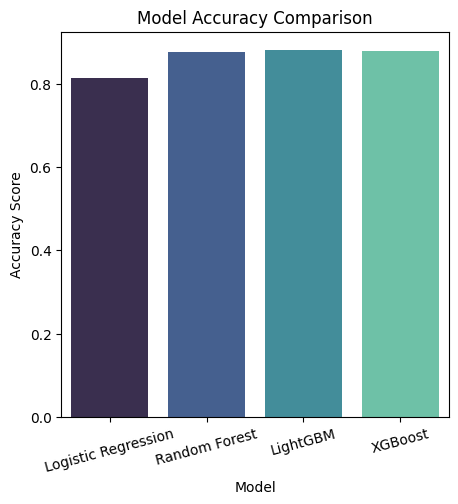

In [36]:
plt.figure(figsize=(5,5))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="mako")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.xticks(rotation=15)
plt.show()

In [37]:
best_model_name = results_df.sort_values(by="Accuracy", ascending=False).iloc[0]["Model"]
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

print(f"Best Model: {best_model_name}\n")
print(classification_report(y_test, y_pred_best))

Best Model: LightGBM

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      2067
           1       0.84      0.86      0.85      2065
           2       0.89      0.90      0.90      3875

    accuracy                           0.88      8007
   macro avg       0.88      0.88      0.88      8007
weighted avg       0.88      0.88      0.88      8007



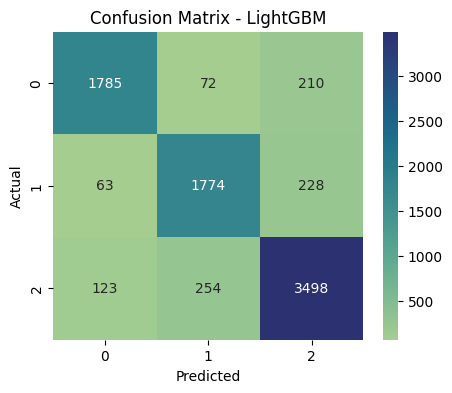

In [38]:
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='crest', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Overview:
### .The dataset contains information about 40,000 online game players, including their age, gender, playtime, purchases, game genre, and engagement levels.
### .The goal of this analysis was to explore how weekly gaming hours relate to players’ engagement levels and other behavioral patterns.

# 🧩 Summary:
## .Gender Distribution:
### The dataset consists of approximately 60% male and 40% female gamers. A similar pattern is observed in in-game purchases, where males account for about 60% of the total transactions.
## .Daily Gaming Time:
### The majority of players (around 68.5%) spend between 44 to 144 minutes per day on gaming. This trend appears consistent across almost all age groups represented in the dataset.
## .Purchase Behavior vs. Game Difficulty:
### Most purchases are made by players who prefer easy difficulty levels. This suggests that gaming companies could benefit from developing titles with well-balanced mechanics and reward systems that cater to casual players while keeping the gameplay engaging.
## .Engagement Levels:
### The dataset indicates that most players demonstrate a medium level of engagement, followed by a high level. This implies that games are generally successful in retaining players, though there is still room to enhance player engagement through personalized rewards, creative in-game challenges, and advanced social features that encourage player interaction.
## Regional Insights:
### Gaming activity is highest in the USA, followed by Europe and Asia, with the lowest participation in other regions. To reach a broader audience, companies should focus on optimizing game performance and server infrastructure in less developed regions, where the cost of high-spec gaming systems remains a barrier.

## Best Model:
### LightGBM emerged as the best-performing model, offering a scalable and interpretable framework for gaming analytics.

In [39]:
import joblib

joblib.dump(best_model, "lightgbm_model.pkl")


['lightgbm_model.pkl']